In [18]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3
from jupytext.config import find_jupytext_configuration_file
print('jupytext config file is ',find_jupytext_configuration_file('.'))

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
pjr3.py complete
jupytext config file is  /global/homes/p/pjr/.config/jupytext


<Figure size 432x288 with 0 Axes>

In [19]:
print ("two vals of pi", np.pi, pi)

two vals of pi 3.141592653589793 3.141592653589793


$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [20]:
hy2plev?

Signature: hy2plev(T, P, pout, verbose=False)
Docstring:
hy2plev(T, P, pout)
interpolate a field from hybrid to pressure coordinates
    assumes the input fields are xarray dataarrays
    tested for EAM/CAM cubed sphere and lat/lon grids
    
       T the array on hybrid surfaces
       P the pressures on hybrid surfaces 
       pout the pressures to interpolate to (array or scalar)
File:      ~/Python/pjr3.py
Type:      function


In [21]:
plotZMf?

Signature:
plotZMf(
    data,
    x,
    y,
    plotOpt=None,
    modelLevels=None,
    surfacePressure=None,
    axesa=None,
    fig=None,
)
Docstring:
Create a zonal mean contour plot of one variable
axesa = the axes that we make the plot on 
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
x = 1d numpy array of latitude
y = 1d numpy array of pressures (or pseudo pressure (like eta))
plotOpt is a optional dictionary with plotting options:
  'scale_factor': multiply values with this factor before plotting
  'units': a units label for the colorbar
  'clevs': use list of values as contour intervals
  'cmap': the color map to use
  'cabv': the above color
  'cbel': the below color
  'colorbar': location of colorbar ('bot','top','left','right','None')
  'rmClev': contour level to delete; frequently Zero, see findNiceContours
  'title': a title for the plot
  'ybot': if present, the pressure at the plot bottom
  'ytop': if present, the pressure at the to

In [22]:
from nco import Nco

In [23]:
# identify a model case directory, and a directory to store remapped climo files
import os
#host = os.environ.get('HOST')
#print(host)
#print(os.environ)
import platform
host = platform.node()
print(host)
filename = os.path.expanduser('~/my_folder/output.txt')
if ('cori' in host):
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*-06.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.0049-06.nc'
    indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
else:
    indir = os.path.expanduser('~/NetCDF_Files/vd05_JJA_climo.nc')
    #indir = os.path.expanduser('~/NetCDF_Files/F2010_PJR1.eam.h0.0001-01.nc')
print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir).chunk({'time': 20})
#print(DS)
weights = DS.area
weights.name = 'weights'
print(weights)
print('weights.sum',weights.sum().values,4.*pi)
#Var = DS.FSNT.isel(time=0)
Var = DS.FSNT - DS.FLNT
print(Var.shape)
#Varwt = Var.weighted(weights)
#print(Varwt)
#Varmean = Varwt.mean('ncol')
#print(Varmean)
#Varm2 = Var.weighted(weights).mean('ncol')
Varm2 = Var.weighted(weights).mean()
print('area weighted mean', Varm2.values)

cori14
/global/homes/p/pjr/NetCDF_Files/vd05_ANN_climo.nc
<xarray.DataArray 'weights' (lat: 192, lon: 288)>
dask.array<open_dataset-20bb9a22507f6637a3a3317a4a931110area, shape=(192, 288), dtype=float64, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.76 -89.06 -88.12 -87.17 ... 88.12 89.06 89.76
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:      solid angle subtended by gridcell
    standard_name:  cell_area
    units:          steradian
    cell_methods:   lat, lon: sum
weights.sum 12.566370614359174 12.566370614359172
(1, 192, 288)
area weighted mean -2.2649207395621542


-2.2649207395621542


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-2.76492074, -2.66492074, -2.56492074, -2.46492074, -2.36492074,
        -2.26492074, -2.16492074, -2.06492074, -1.96492074, -1.86492074,
        -1.76492074]),
 <BarContainer object of 10 artists>)

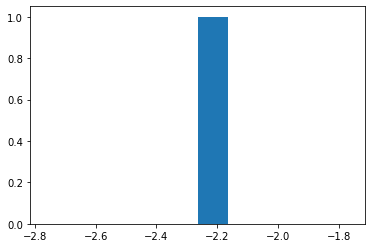

In [24]:
print(Varm2.values)
Varm2.plot()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([236.68125241, 236.78125241, 236.88125241, 236.98125241,
        237.08125241, 237.18125241, 237.28125241, 237.38125241,
        237.48125241, 237.58125241, 237.68125241]),
 <BarContainer object of 10 artists>)

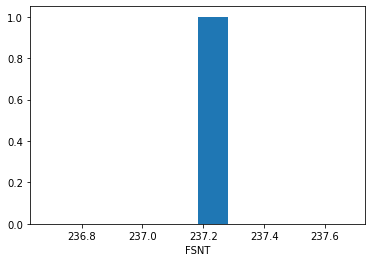

In [25]:
FSNT = DS.FSNT
#FSNTg = FSNT.weighted(weights).mean('ncol')
FSNTg = FSNT.weighted(weights).mean()
FSNTg.plot()

In [26]:

inCmd='ncdump -v time '+indir+' | grep "FRAC.*="'
outCmd = os.popen(inCmd).read()
print(inCmd)
print(outCmd)

ncdump -v time /global/homes/p/pjr/NetCDF_Files/vd05_ANN_climo.nc | grep "FRAC.*="
		CLOUDFRAC_CLUBB:mdims = 9 ;
		CLOUDFRAC_CLUBB:units = "fraction" ;
		CLOUDFRAC_CLUBB:long_name = "Cloud Fraction" ;
		CLOUDFRAC_CLUBB:cell_methods = "time: mean" ;
		ICEFRAC:units = "fraction" ;
		ICEFRAC:long_name = "Fraction of sfc area covered by sea-ice" ;
		ICEFRAC:cell_methods = "time: mean" ;
		LANDFRAC:units = "fraction" ;
		LANDFRAC:long_name = "Fraction of sfc area covered by land" ;
		LANDFRAC:cell_methods = "time: mean" ;
		OCNFRAC:units = "fraction" ;
		OCNFRAC:long_name = "Fraction of sfc area covered by ocean" ;
		OCNFRAC:cell_methods = "time: mean" ;



In [27]:
T = DS.T
print(T)

<xarray.DataArray 'T' (time: 1, lev: 72, lat: 192, lon: 288)>
dask.array<open_dataset-20bb9a22507f6637a3a3317a4a931110T, shape=(1, 72, 192, 288), dtype=float32, chunksize=(1, 72, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.76 -89.06 -88.12 -87.17 ... 88.12 89.06 89.76
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 0.1238 0.1828 0.2699 0.3986 ... 986.2 993.8 998.5
  * time     (time) object 0003-06-16 12:00:00
Attributes:
    mdims:         9
    units:         K
    long_name:     Temperature
    cell_methods:  time: mean


plotting on eta levels
vals (72, 192)
lat (192,)
lev (72,)


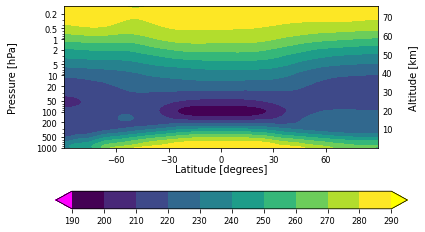

In [28]:
#DS = xr.open_dataset('~/NetCDF_Files/vd05_ANN_climo.nc')
#print (DS.T) 
T = DS.T.isel(time=0)
#T?
TZ = T.mean(dim='lon')
#TZ?
lev = TZ['lev']
lat = TZ['lat']
vals = TZ.values
print('plotting on eta levels')
plotZMf(vals, lat, lev)


In [29]:
# demonstrate shape specification to force correct broadcasting
# add a vector of numbers to a particular axis (in this case axis=1)
pout = np.arange(20)
x = np.zeros([2,20,100])
newshape = [1,20,1]
z = x + pout.reshape(newshape)
print('z shape', z.shape)
print(z[0,:,3])
print(z[1,:,-1])

z shape (2, 20, 100)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


In [30]:
# interpolate xarray datavariable on eta hybrid surfaces to pressure

indir = os.path.expanduser('~/NetCDF_Files/F2010*-01.nc')
#indir = os.path.expanduser('/lustre/choi040/20210920.F2010.1Nudg.ne30pg2_r05_oECv3/run/20210920.F2010.1Nudg.ne30pg2_r05_oECv3.eam.h2.2015-01-01-00000.nc')
#indir = os.path.expanduser('~/NetCDF_Files/*F2010*01.nc')
#indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')

print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir).chunk({'time': 20})


    
Tin = DS.T
Tin = Tin.squeeze()
#print("Tin",Tin)
Pin = (DS.hyam*DS.P0 + DS.hybm*DS.PS)/100.
Pin.attrs["units"] = 'hPa'
Pin.attrs["long_name"] = 'Pressure'
Pin = Pin.squeeze()
nzout = 20
pout = np.linspace(1.,1000.,nzout)
#pout = [850.]
#pout = 850.
#print ("pout", pout.shape, pout)

Tout = hy2plev(Tin, Pin, pout)


/global/homes/p/pjr/NetCDF_Files/F2010*-01.nc


pjr3.py complete
plotting  <xarray.DataArray (ncol: 21600)>
array([285.35014074, 284.80348245, 286.31016305, ..., 264.18005051,
       264.78022066, 265.25982283])
Coordinates:
    time     object 0001-02-01 00:00:00
    plev     float64 850.0
Dimensions without coordinates: ncol
Attributes:
    mdims:          1
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature
    cell_methods:   time: mean


<function matplotlib.pyplot.show(close=None, block=None)>

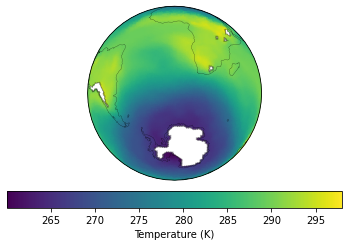

In [31]:
%run -i ~/Python/pjr3
from cartopy import crs

indir = os.path.expanduser('/lustre/choi040/20210920.F2010.1Nudg.ne30pg2_r05_oECv3/run/20210920.F2010.1Nudg.ne30pg2_r05_oECv3.eam.h0.2015-01.nc')
indir = os.path.expanduser('~/NetCDF_Files/F2010_PJR1.eam.h0.0001-01.nc')

DS = xr.open_mfdataset(indir).chunk({'time': 20})
Tout = DS.PS.isel(time=0)
#indir = os.path.expanduser('/lustre/choi040/20210920.F2010.1Nudg.ne30pg2_r05_oECv3/run/20210920.F2010.1Nudg.ne30pg2_r05_oECv3.eam.h2.2015-01-01-00000.nc')
#DS = xr.open_mfdataset(indir).chunk({'time': 20})
#Tout = DS.T850.isel(time=0)

Tin = DS.T
Tin = Tin.squeeze()
#print("Tin",Tin)
Pin = (DS.hyam*DS.P0 + DS.hybm*DS.PS)/100.
Pin.attrs["units"] = 'hPa'
Pin.attrs["long_name"] = 'Pressure'
Pin = Pin.squeeze()
pout = 850.

Tout2 = hy2plev(Tin, Pin, pout).squeeze()

# Read data
data = Tout2
print('plotting ', data)

lon = DS['lon']
lat = DS['lat']

dataproj=crs.PlateCarree()    # data is always assumed to be lat/lon
plotproj=crs.Orthographic(central_latitude=-50)   # any projections should work 
ax = plt.axes(projection=plotproj)
ax.set_global()
ax.coastlines(linewidth=0.2)

tcoords = plotproj.transform_points(dataproj,np.array(lon[:]),np.array(lat[:]))
data2d = data
#xi=tcoords[:,0]!=np.inf
xi = np.where(~(np.isnan(tcoords[:,0])|np.isinf(tcoords[:,0])))[0] # this works for either
tc=tcoords[xi,:]
datai=data2d[:][xi]  # convert to numpy array, then subset
dmin = datai.min().values
dmax = datai.max().values
pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='gouraud',vmin=dmin,vmax=dmax) # looks good
#pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='flat') # looks bad
# Add colorbar to plot
cb = plt.colorbar(
    pl, orientation='horizontal',
    label='%s (%s)'%(data.long_name, data.units), pad=0.05
)
plt.show

ind 16500 -83.20921924057815 6.311501752522137
Tout (21600,) (21600,)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([72009.87 , 72009.97 , 72010.07 , 72010.164, 72010.266, 72010.37 ,
        72010.47 , 72010.57 , 72010.664, 72010.766, 72010.87 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

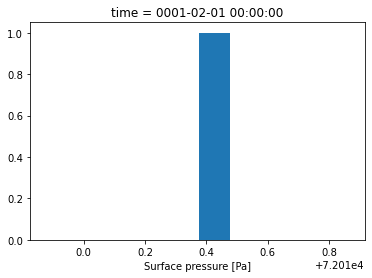

In [32]:
# plot a column specified by xlook and ylook for fields specified on a cubed sphere grid
xlook = 0.
ylook = -90.
lat = DS['lat'].values#[0,:]
#print('latshape',lat.shape)
#print('lat4',lat[0:3])
lon = DS['lon'].values#[0,:]
#print('lon4',lon[0:3])
#print('lat',lat.min(),lat.max())
#print('lon',lon.min(),lon.max())
dist = np.abs(ylook-lat) + np.abs(xlook-lon)
#print('dist',dist)
ind = np.where(dist == np.min(dist))
ind = int(ind[0])
#print('ind',ind, ind.shape, ind[0])
print('ind',ind,lat[ind],lon[ind])
print('Tout', Tout.shape, Tout.squeeze().shape)
#Toutm = Tout.mean(dim=['ncol','time'])
#Tinm = Tin[0,:,ind]
#print('Tinm',Tinm.values)
#Pinm = Pin[0,:,ind]
#print('Pinm',Pinm.values)
#tind = 0
#for index, item in enumerate(Pinm):
#    print('Pinx ',index, Pinm[index].values, Tinm[index].values)
#Toutm = Tout[:,ind]
Toutm = Tout[ind]
#print('Toutm',Toutm)
#for index, item in enumerate(Toutm):
#    print('Poutx ',index, pout[index], Toutm[index].values)

Toutm.plot()

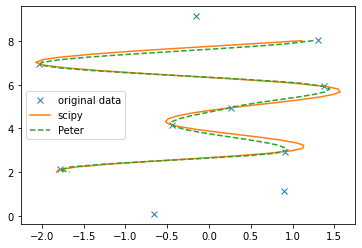

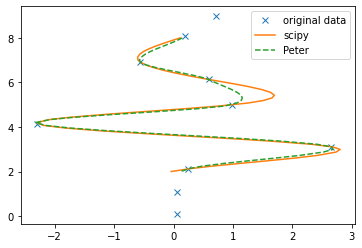

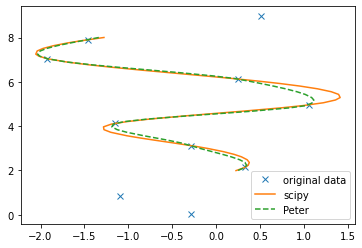

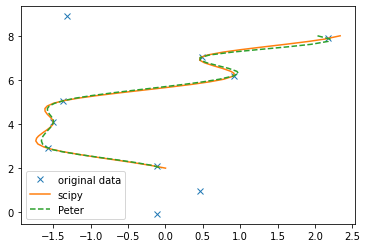

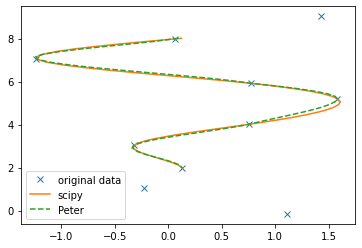

In [33]:
# fast 1d interpolation of fields along an axis
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as scipy1d

# toy coordinates and data
nx, ny, nz = 25, 30, 10
x = np.arange(nx)
y = np.arange(ny)
z = np.tile(np.arange(nz), (nx,ny,1)) + np.random.randn(nx, ny, nz)*.1
testdata = np.random.randn(nx,ny,nz) # x,y,z

# Desired z-coordinates (must be between bounds of z)
znew = np.tile(np.linspace(2,nz-2,50), (nx,ny,1)) + np.random.randn(nx, ny, 50)*0.01

# Inverse the coordinates for testing
z = z[..., ::-1]
znew = znew[..., ::-1]

# Now use own routine 
ynew = interp_along_axis(testdata, z, znew, axis=2, inverse=True, method='cubic')

# Check some random profiles
for i in range(5):
    randx = np.random.randint(nx)
    randy = np.random.randint(ny)

    checkfunc = scipy1d(z[randx, randy], testdata[randx,randy], kind='cubic')
    checkdata = checkfunc(znew)

    fig, ax = plt.subplots()
    ax.plot(testdata[randx, randy], z[randx, randy], 'x', label='original data')
    ax.plot(checkdata[randx, randy], znew[randx, randy], label='scipy')
    ax.plot(ynew[randx, randy], znew[randx, randy], '--', label='Peter')
    ax.legend()
    plt.show()
